In [589]:
import sys
sys.path.insert(0, '../Triangulation/')
sys.path.insert(0, '../point_coordinates_regression/')

sys.path.insert(0, '../network_datasets')



In [590]:
import pickle
import torch
import numpy as np
from matplotlib import  pyplot as plt


from point_coordinates_regression import *

In [584]:
def sort_points_filter(point_coordinates,nb_of_points):
    polygon=point_coordinates.reshape(len(point_coordinates),nb_of_points,2)
    barycenters=extract_barycenter(point_coordinates,nb_of_points)
    angles=[]
    polygons=point_coordinates.reshape(len(point_coordinates),nb_of_points,2)
    vectors=polygons-barycenters

    for  barycenter_vectors in vectors:
        for vector in barycenter_vectors:
            angles.append(angle_counterclockwise(np.array([1,0]),vector))
            
    sorted_angles=sorted(angles)             
    angles=np.array(angles).reshape(len(vectors),nb_of_points,1)
    print(sorted_angles)
    point_coordinates_with_angles=np.dstack([polygons,angles])
    print(point_coordinates_with_angles)
    point_coordinates_sorted=[]
    for points in point_coordinates_with_angles:
        points_sorted=np.array(sorted(points,key=lambda x: x[2]))
        points_sorted=points_sorted[:,0:2]
        point_coordinates_sorted.append(points_sorted.reshape(1,nb_of_points,2))
    point_coordinates_sorted=np.array(point_coordinates_sorted)  
    point_coordinates_with_angles_sorted={str(i):a for i,a in zip(point_coordinates_sorted.reshape(nb_of_points,2),sorted_angles)}
    sorted_point_indices=[i for i in point_coordinates_with_angles_sorted.keys()]
    sorted_angles_differences=[abs(sorted_angles[(int(i+1))%(len(sorted_angles)-1)]-sorted_angles[i]) for i in range(len(sorted_angles))]
    angle_differences={str(sorted_point_indices[(int(i+1))%(len(sorted_point_indices)-1)])+'-'+str(sorted_point_indices[i]):angle_diff for i,angle_diff in enumerate(sorted_angles_differences)}
    print(angle_differences)
    point_coordinates_sorted=point_coordinates_sorted.reshape(nb_of_points,2)
    
    angle_threshold=20
    angle_indices=np.where(np.array(sorted_angles)>360-angle_threshold)
    angle_indices=np.array(angle_indices)
    if angle_indices.size>0:
        print("flipping")
        point_coordinates_sorted=np.roll(point_coordinates_sorted,angle_indices.size,axis=0)
    
    
    
    if len(point_coordinates_sorted)>3:

        for coordinates,angle_difference in angle_differences.items():
            if angle_difference<15:
                coordinate1,coordinate2=coordinates.split('-')
                coordinate1=np.fromstring(coordinate1.replace("["," ").replace("]"," "),sep=' ')  
                coordinate2=np.fromstring(coordinate2.replace("["," ").replace("]"," "),sep=' ')                       

                print(coordinate1)
                print(coordinate2)
                point_index1=point_coordinates_sorted.reshape(nb_of_points,2).tolist().index(coordinate1.tolist())
                point_index2=point_coordinates_sorted.reshape(nb_of_points,2).tolist().index(coordinate2.tolist())
                print(point_index1,point_index2)

                distance1=np.linalg.norm(barycenters- point_coordinates_sorted[point_index1])
                distance2=np.linalg.norm(barycenters- point_coordinates_sorted[point_index2])
                minimum_index=np.argmin(np.array(distance1,distance2))
                if minimum_index==0 or minimum_index==1:
                    temp=np.copy(point_coordinates_sorted[point_index1])
                    point_coordinates_sorted[point_index1]=point_coordinates_sorted[point_index2]
                    point_coordinates_sorted[point_index2]=temp
            
            
    return  point_coordinates_sorted,angle_differences

In [585]:
coordinates=np.array([[ 0.2045408 ,  -0.05421278],
       [-0.2262057 ,  0.04454686]])

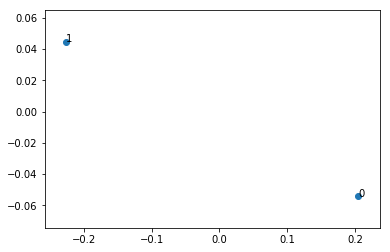

In [586]:
coordinates_dict={i:coordinate for i,coordinate in enumerate(coordinates)}
plt.scatter(coordinates[:,0],coordinates[:,1])

for i,txt in enumerate(list(coordinates_dict.keys())):
    plt.annotate(txt,(coordinates[i,0],coordinates[i,1]))

In [587]:
sorted_coordinates,_=sort_points_filter(coordinates.reshape(1,len(coordinates)*2),len(coordinates))

[167.0866642866528, 347.08666428665276]
[[[ 2.04540800e-01 -5.42127800e-02  3.47086664e+02]
  [-2.26205700e-01  4.45468600e-02  1.67086664e+02]]]
{'[-0.2262057   0.04454686]-[-0.2262057   0.04454686]': 0.0, '[-0.2262057   0.04454686]-[ 0.2045408  -0.05421278]': 179.99999999999997}
flipping


array([[ 0.2045408 , -0.05421278],
       [-0.2262057 ,  0.04454686]])

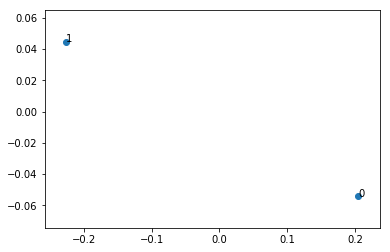

In [588]:
sorted_coordinates_dict={i:coordinate for i,coordinate in enumerate(sorted_coordinates)}
plt.scatter(sorted_coordinates[:,0],sorted_coordinates[:,1])

for i,txt in enumerate(list(sorted_coordinates_dict.keys())):
    plt.annotate(txt,(sorted_coordinates[i,0],sorted_coordinates[i,1]))
    
sorted_coordinates

In [503]:
t=np.copy(sorted_coordinates[0])
sorted_coordinates[0]=sorted_coordinates[2]
sorted_coordinates[2]=t

IndexError: index 2 is out of bounds for axis 0 with size 2

In [488]:
sorted_coordinates

array([[-1.   ,  0.   ],
       [ 0.2  ,  0.3  ],
       [ 0.5  ,  0.025],
       [ 0.5  , -0.025]])

In [489]:
distance_array=np.array([0.5055937104039172,0.3010398644698075 ])

In [490]:
np.roll(sorted_coordinates,2,axis=0)

array([[ 0.5  ,  0.025],
       [ 0.5  , -0.025],
       [-1.   ,  0.   ],
       [ 0.2  ,  0.3  ]])

In [560]:
A=np.array([1,3])

In [561]:
A.size

2